# FMRI DATA ANALYSIS - NARPS DATASET TEAM 4TQ6

**Pipeline description** 

- Use fmriprep dataset ; FSL v5.0.4 ; Feat v6
- 6mm FWHM Gaussian kernel, applied to the fmriprep data, so in MNI space ;

Independant variables
- Event-Related design, 4 second events, with parametric modulation based on amount gained or lost on each trial. One 'gain' regressor, and one 'loss' regressor. 
- First temporal derivatives of the two regressors were also used, along with temporal filtering (60 s) of all the independent variable time-series. 
- No motion parameter regressors used. 
- No RT modelling
- For second level analysis, a group level between-subjects analysis was run to compare between "equal range" and "equal indifference" groups; no additional covariates, no additional between-subject effects.
- For the within-group effects a group average analysis was computed with a single, constant, regressor. Also no covariates in these analyses.

Model settings
- First level: Standard FSL approach, using FILM prewhitening for correction of autocorrelation and high-pass filtering (60 s) to remove low frequency effects from both the data, and the model.
- Second level (single-subject, mean of all four scans) analyses: Fixed effects analysis.
- Group level: Mixed effects "FLAME 1". Specific variance structure: As in FSL's FLAME-1 model. 

Inferences
- First-level analyses: Linear contrast effects: 'Gain' vs. baseline, 'Loss' vs. baseline.
- Second-level: Linear contrast effects - simple mean across each subjects four scans,  for each lower-level contrast.
- Group-level (group average) analysis: Simple mean across all subjects for each lower-level contrast. 
- Group-level (between-groups comparison): Linear effect between groups for each lower-level contrast.

Statistics 
- Cluster-wise: Threshold-free Cluster Enhancement (TFCE) with default parameters.
- FSL's 'Randomise' non-parametric permutation testing algorithm was used for inference.
- 5000 permutations were run using 'Randomise'.

**To use this notebook :** 
- Download fMRIprep datas available [**here**](https://openneuro.org/datasets/ds001734/versions/1.0.4) or in [**datalad**](http://datasets.datalad.org/?dir=/workshops/nih-2017/ds001734).
- Modify the paths:
    - **exp_dir**: directory where the ds001734-download repository is stored
    - **result_dir**: directory where the intermediate and final repositories will be stored
    - **working_dir**: name of the directory where intermediate results will be stored
    - **output_dir**: name of the directory where final results will be stored
    
- Select the number of subject you want to use by changing the value of the **nsub** variable.
    - For preprocessing & l1 analysis, all subjects will be analyzed. 
    - For l2 analysis, if **nsub < 108**, the required number of subject will be randomly selected from the dataset.

Botvinik-Nezer, R., Holzmeister, F., Camerer, C.F., Dreber, A., Huber, J., Johannesson, M., Kirchler, M., Iwanir, R., Mumford, J.A., ..., Nichols, T.E., Poldrack, R.A., Schonberg, T. (2020). Variability in the analysis of a single neuroimaging dataset by many teams. Nature. https://doi.org/10.1038/s41586-020-2314-9.

In [1]:
from lib import pipelines_4TQ6
from os.path import join as opj
import os
import json

In [2]:
team_ID = "4TQ6"

# Important directories
## exp_dir : where the data are stored (where the ds001734 directory is stored)
exp_dir = '/data/NARPS/ds001734-download'

## result_dir : where results are stored 
result_dir = '/local/egermani/analytic_variability_fmri/data/derived/reproduced'

## working_dir : where the intermediate outputs will be store
working_dir = f"NARPS-{team_ID}-reproduced/intermediate_results"

## output_dir : where the final results will be store
output_dir = f"NARPS-{team_ID}-reproduced"

## Single subject - Single run analysis

### In/out Nodes + Important values

In [3]:
dir_list = os.listdir(exp_dir)

# Subject list (to which we will do the analysis)
subject_list = []
for dirs in dir_list:
    if dirs[0:3] == 'sub':
        subject_list.append(dirs[-3:])

# Run to use for this analysis
run_list = ['01', '02', '03', '04']

n_sub = 108

#TR
with open(opj(exp_dir, 'task-MGT_bold.json'), 'rt') as fp:
    task_info = json.load(fp)
TR = task_info['RepetitionTime']

#FWHM to smooth
fwhm = 6

In [4]:
subject_list = ["001", "002", "003", "004", "005", "006", "008", "009", "010", "011", "013", "014", "015", "016", "017", "018", "019", "020"]
contrast_list = ['1', '2']

In [5]:
#l1_analysis = pipelines_4TQ6.get_l1_analysis(subject_list, run_list, TR, fwhm, exp_dir, 
#                                             output_dir, working_dir, result_dir)

In [6]:
#l1_analysis.run('MultiProc', plugin_args={'n_procs': 4})

## Second level analysis - Concatenate runs

In [7]:
#l2_analysis = pipelines_4TQ6.get_l2_analysis(subject_list, contrast_list, run_list, exp_dir, 
#                                             output_dir, working_dir, result_dir)

In [8]:
#l2_analysis.run('MultiProc', plugin_args={'n_procs': 8})

## Third level analysis - Group level 

In [9]:
n_sub = len(subject_list)

In [10]:
l3_analysis_equalRange = pipelines_4TQ6.get_group_workflow(subject_list, n_sub, contrast_list, "equalRange", exp_dir, 
                                             output_dir, working_dir, result_dir)

l3_analysis_equalIndiff = pipelines_4TQ6.get_group_workflow(subject_list, n_sub, contrast_list, "equalIndifference", 
                                                            exp_dir, output_dir, working_dir, result_dir)

l3_analysis_groupComp = pipelines_4TQ6.get_group_workflow(subject_list, n_sub, contrast_list, "groupComp", exp_dir, 
                                                         output_dir, working_dir, result_dir)

In [11]:
l3_analysis_equalRange.run('MultiProc', plugin_args={'n_procs': 8})

220228-14:00:51,698 nipype.workflow INFO:
	 Workflow l3_analysis settings: ['check', 'execution', 'logging', 'monitoring']
220228-14:00:51,762 nipype.workflow INFO:
	 Running in parallel.
220228-14:00:51,782 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
220228-14:00:51,914 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis.selectfiles_3rdlevel" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis/_contrast_id_1/selectfiles_3rdlevel".
220228-14:00:51,917 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis.selectfiles_3rdlevel" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis/_contrast_id_2/selectfiles_3rdlevel".
220228-14:00:51,922 nipype.workflow INFO:
	 [Node] Executing "selectfiles_3rdlevel" <nipype.interfaces.io.SelectFiles>
220228-14:00:51,923 nipype.

RuntimeError: 2 raised. Re-raising first.

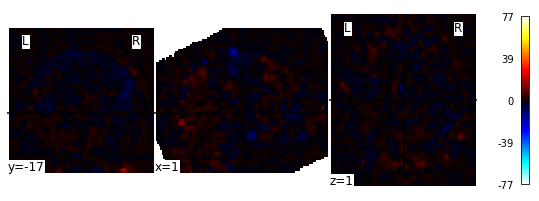

In [14]:
import nibabel as nib
from nilearn import plotting

plotting.plot_stat_map('/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/l1_analysis/_run_id_01_subject_id_002/results/cope1.nii.gz')

In [10]:
l3_analysis_equalIndiff.run('MultiProc', plugin_args={'n_procs': 8})

211205-14:14:11,18 nipype.workflow INFO:
	 Workflow l3_analysis_equalIndifference_nsub_42 settings: ['check', 'execution', 'logging', 'monitoring']
211205-14:14:11,36 nipype.workflow INFO:
	 Running in parallel.
211205-14:14:11,39 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211205-14:14:11,121 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_42.selectfiles_3rdlevel" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndifference_nsub_42/_contrast_id_1/selectfiles_3rdlevel".
211205-14:14:11,122 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_42.selectfiles_3rdlevel" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndifference_nsub_42/_contrast_id_2/selectfiles_3rdlevel".
211205-14:14:11,128

211205-14:14:17,110 nipype.workflow INFO:
	 [Node] Finished "specifymodel_3rdlevel", elapsed time 0.001214s.
211205-14:14:17,110 nipype.workflow INFO:
	 [Node] Finished "specifymodel_3rdlevel", elapsed time 0.001144s.
211205-14:14:19,47 nipype.workflow INFO:
	 [Job 10] Completed (l3_analysis_equalIndifference_nsub_42.specifymodel_3rdlevel).
211205-14:14:19,49 nipype.workflow INFO:
	 [Job 11] Completed (l3_analysis_equalIndifference_nsub_42.specifymodel_3rdlevel).
211205-14:14:19,51 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211205-14:14:19,98 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_42.randomise" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndifference_nsub_42/_contrast_id_1/randomise".
211205-14:14:19,100 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_

In [11]:
l3_analysis_groupComp.run('MultiProc', plugin_args={'n_procs': 8})

211205-14:15:35,149 nipype.workflow INFO:
	 Workflow l3_analysis_groupComp_nsub_42 settings: ['check', 'execution', 'logging', 'monitoring']
211205-14:15:35,168 nipype.workflow INFO:
	 Running in parallel.
211205-14:15:35,171 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211205-14:15:35,256 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_42.selectfiles_3rdlevel" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_42/_contrast_id_1/selectfiles_3rdlevel".
211205-14:15:35,257 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_42.selectfiles_3rdlevel" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_42/_contrast_id_2/selectfiles_3rdlevel".
211205-14:15:35,263 nipype.workflow INFO:
	 [Node] Execu

211205-14:15:41,245 nipype.workflow INFO:
	 [Node] Finished "specifymodel_3rdlevel", elapsed time 0.002279s.
211205-14:15:41,246 nipype.workflow INFO:
	 [Node] Finished "specifymodel_3rdlevel", elapsed time 0.002063s.
211205-14:15:43,178 nipype.workflow INFO:
	 [Job 10] Completed (l3_analysis_groupComp_nsub_42.specifymodel_3rdlevel).
211205-14:15:43,180 nipype.workflow INFO:
	 [Job 11] Completed (l3_analysis_groupComp_nsub_42.specifymodel_3rdlevel).
211205-14:15:43,182 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211205-14:15:43,226 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_42.randomise" in "/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_42/_contrast_id_1/randomise".
211205-14:15:43,228 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_42.randomise" in "/local/egermani/an

In [9]:
pipelines_4TQ6.reorganize_results(result_dir, output_dir, n_sub, team_ID)

PermissionError: [Errno 13] Permission denied: '/home/analytic_variability_fmri/data/derived/reproduced/NARPS-reproduction/team_4TQ6_nsub_33_hypo1_unthresholded.nii.gz'